Omzetten van h5py file naar losse JPGs

In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import pandas as pd
import os
import h5py
import numpy as np
from tensorflow.keras import utils
import matplotlib.image
import matplotlib.pyplot as plt
from random import choice

sys.path.insert(0, "..")
sys.path

['..',
 'c:\\Users\\hjtfs\\ML_Huub\\HuubS_ML_Opdracht\\template\\notebooks',
 'c:\\Users\\hjtfs\\.vscode\\extensions\\ms-toolsai.jupyter-2021.11.1001550889\\pythonFiles',
 'c:\\Users\\hjtfs\\.vscode\\extensions\\ms-toolsai.jupyter-2021.11.1001550889\\pythonFiles\\lib\\python',
 'C:\\Users\\hjtfs\\.pyenv\\pyenv-win\\versions\\3.8.1\\python38.zip',
 'C:\\Users\\hjtfs\\.pyenv\\pyenv-win\\versions\\3.8.1\\DLLs',
 'C:\\Users\\hjtfs\\.pyenv\\pyenv-win\\versions\\3.8.1\\lib',
 'C:\\Users\\hjtfs\\.pyenv\\pyenv-win\\versions\\3.8.1',
 'C:\\Users\\hjtfs\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\hu-deeplearning-lSm0EZYV-py3.8',
 '',
 'C:\\Users\\hjtfs\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\hu-deeplearning-lSm0EZYV-py3.8\\lib\\site-packages',
 'C:\\Users\\hjtfs\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\hu-deeplearning-lSm0EZYV-py3.8\\lib\\site-packages\\win32',
 'C:\\Users\\hjtfs\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\hu-deeplearning-lSm0EZYV-py3.8\\lib\\site-packages\\wi

In [2]:
data_dir = Path("../src/data/raw")
data_dir

WindowsPath('../src/data/raw')

In [3]:
def get_size(start_path = data_dir):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

    return total_size

print(get_size(), 'bytes')

110062551 bytes


In [4]:
from src.data import make_dataset

datagen_kwargs = dict(rescale=1./255, validation_split=0.2)
dataflow_kwargs = dict(target_size=(64, 64), batch_size=32,
                    interpolation="bilinear")

train, valid = make_dataset.create_generators(datagen_kwargs, dataflow_kwargs, 
                                              datadir = data_dir,
                                              augment=False)


2022-01-22 10:10:44.216 | INFO     | src.data.make_dataset:create_generators:38 - Creating validation set data generator
2022-01-22 10:10:44.393 | INFO     | src.data.make_dataset:create_generators:48 - Creating train set data generator


Found 3542 images belonging to 10 classes.
Found 14194 images belonging to 10 classes.


In [5]:
X, y = next(train)

In [6]:
X.shape, y.shape

((32, 64, 64, 3), (32, 10))

In [7]:
class_names = train.class_indices
print(class_names)


{'0_Disturbed Galaxies': 0, '1_Merging Galaxies': 1, '2_Round Smooth Galaxies': 2, '3_In-between Round Smooth Galaxies': 3, '4_Cigar Shaped Smooth Galaxies': 4, '5_Barred Spiral Galaxies': 5, '6_Unbarred Tight Spiral Galaxies': 6, '7_Unbarred Loose Spiral Galaxies': 7, '8_Edge-on Galaxies without Bulge': 8, '9_Edge-on Galaxies with Bulge': 9}


In [8]:
train.num_classes


10

2022-01-22 10:10:45.814 | INFO     | src.visualization.visualize:plot_batch:17 - image shape: (32, 64, 64, 3)
2022-01-22 10:10:45.814 | INFO     | src.visualization.visualize:plot_batch:18 - label shape: (32, 10)


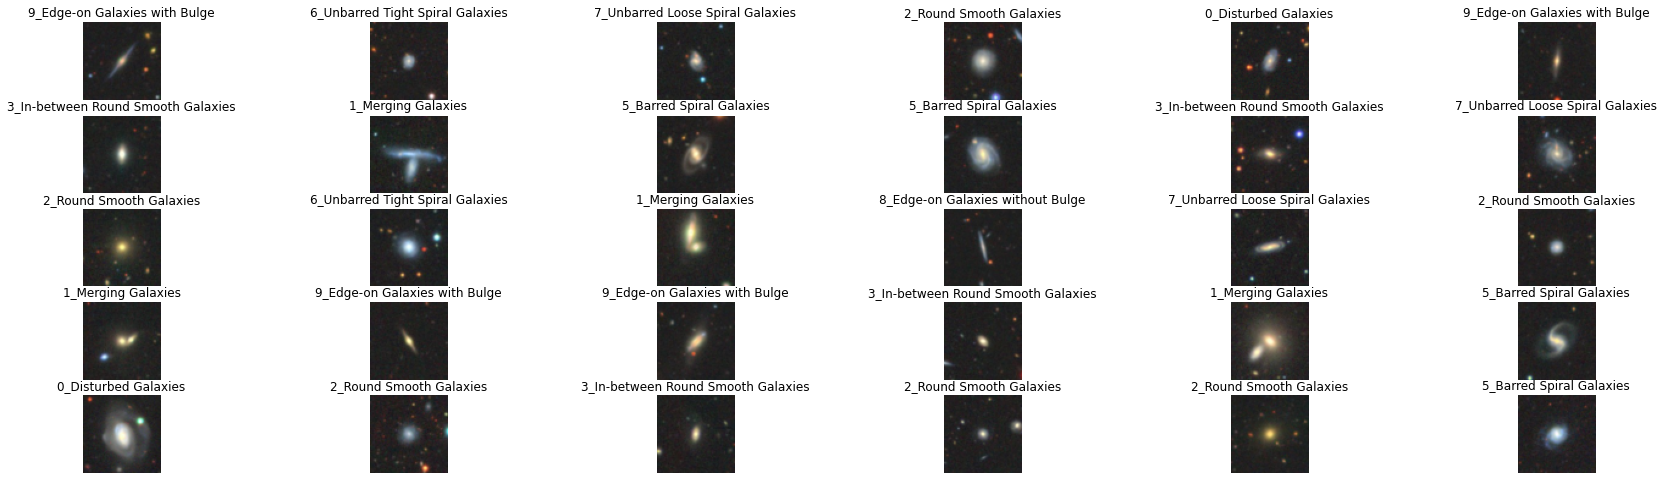

In [9]:
from src.visualization import visualize

visualize.plot_batch(train, grid = 30)
